# 1. Defining the problem statement

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# 2. Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV

train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Data cleaning and Feature Engineering

In [2]:
train_data.shape

(891, 12)

In [3]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# treating missing values using sklearn imputing method

from sklearn.preprocessing import Imputer
imp= Imputer(missing_values='NaN',strategy='median',axis=1)
X_dash=imp.fit_transform(train_data.Age.values.reshape(1,-1))
train_data['Age_imp']=X_dash.T
train_data.drop('Age',axis=1,inplace=True)

C:\Users\Taru\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.00,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.00,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.45,NaN,S,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.00,C148,C,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,0,0,370376,7.75,NaN,Q,32.0


In [6]:
# the features 'ticket','name' and 'cabin' do not influence the survival of a person and therefore these can be dropped

train_data.drop(['Ticket','Cabin','Name'],axis=1, inplace=True)

In [7]:
#using label encoding of sklearn to transform categorical data to numerical data 
from sklearn.preprocessing import LabelEncoder
le_Sex= LabelEncoder()

train_data['Sex_encoded']=le_Sex.fit_transform(train_data.Sex)


In [8]:

#from sklearn.preprocessing import CategoricalEncoder

# This data can be found here -
# https://www.kaggle.com/c/titanic/data
#>>> data = pd.read_csv("titanic.csv")
#sex = train_data["Sex"]
#sex.unique()
#array(['male', 'female'], dtype=object)

#encoder = CategoricalEncoder()
#encoder.fit(sex.values.reshape(-1, 1))

#encoder.transform(sex.head().values.reshape(-1, 1)).todense()
#<5x2 sparse matrix of type '<class 'numpy.float64'>
#with 5 stored elements in Compressed Sparse Row format>

In [9]:
train_data.set_index('PassengerId',inplace=True)
train_data=pd.get_dummies(train_data,columns=["Embarked"],drop_first=True)

#map data

#train_data['Sex'].map({'Male':0, 'Female':1})

train_data['Age_imp']=train_data['Age_imp'].astype(int)
train_data.loc[ train_data['Age_imp'] <= 16, 'Age_imp']= 0
train_data.loc[(train_data['Age_imp'] > 16) & (train_data['Age_imp'] <= 32), 'Age_imp'] = 1
train_data.loc[(train_data['Age_imp'] > 32) & (train_data['Age_imp'] <= 48), 'Age_imp'] = 2
train_data.loc[(train_data['Age_imp'] > 48) & (train_data['Age_imp'] <= 64), 'Age_imp'] = 3
train_data.loc[train_data['Age_imp'] > 64, 'Age_imp'] = 4

train_data['Fare'] = train_data['Fare'].astype(int)
train_data.loc[train_data.Fare<=7.91,'Fare']=0
train_data.loc[(train_data.Fare>7.91) &(train_data.Fare<=14.454),'Fare']=1
train_data.loc[(train_data.Fare>14.454)&(train_data.Fare<=31),'Fare']=2
train_data.loc[(train_data.Fare>31),'Fare']=3

In [10]:
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_imp,Sex_encoded,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,male,1,0,0,1,1,0,1
2,1,1,female,1,0,3,2,0,0,0
3,1,3,female,0,0,0,1,0,0,1
4,1,1,female,1,0,3,2,0,0,1
5,0,3,male,0,0,1,2,1,0,1


In [11]:
train_data.drop('Sex',axis=1,inplace=True)
train_data.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_encoded,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1


# 4. Exploratory Data Analysis

In [12]:
train_data.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_encoded,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,1.453423,1.288440,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,1.124206,0.812038,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [13]:
train_data.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age_imp,Sex_encoded,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,-0.044492,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,-0.358005,0.131900,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,-0.218846,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.134014,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,0.113812,-0.237585,-0.227213,-0.035715
Age_imp,-0.044492,-0.358005,-0.218846,-0.134014,0.113812,1.000000,0.071125,-0.079779,0.016203
Sex_encoded,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,0.071125,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,-0.079779,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.035715,0.016203,0.125722,-0.496624,1.000000


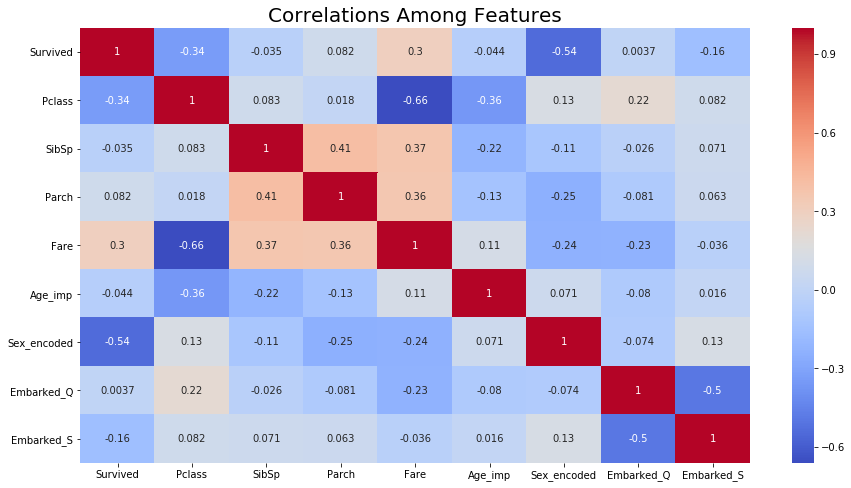

In [14]:
plt.subplots(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True,cmap="coolwarm")
plt.title("Correlations Among Features", fontsize = 20);

In [15]:
X=train_data.drop('Survived',axis=1)
y=train_data['Survived'].astype(int)

# 5. Modelling and Cross-Validation

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

for train_index,test_index in sss.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\Taru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.38

In [18]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,y_train)*100,2)
acc_svc

C:\Users\Taru\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.95

In [19]:
gaussian=GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.49

In [20]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

C:\Users\Taru\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


79.78

In [21]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\Taru\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.9

In [22]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

C:\Users\Taru\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


70.14

# 6. Feature Engineering of test data and Predicting

In [23]:
#Since SVC has the highest accuracy , we will fit our model to SVC classifier
classifier=SVC()
xtrain=train_data.iloc[:,1:]
ytrain=train_data.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)

C:\Users\Taru\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
testImp=Imputer(missing_values='NaN',strategy='most_frequent',axis=1)
Age1=testImp.fit_transform(test_data.Age.values.reshape(1,-1))
Fare2=testImp.fit_transform(test_data.Fare.values.reshape(1,-1))
test_data.drop(['Name','Cabin','Age','Ticket','Fare'],axis=1,inplace=True)
test_data['Age1']=Age1.T
test_data['Fare2']=Fare2.T

C:\Users\Taru\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
test_data.set_index('PassengerId',inplace=True)
test_data = pd.get_dummies(test_data, columns=["Sex"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Embarked"],drop_first=True)



test_data['Fare2'] = test_data['Fare2'].astype(int)
test_data.loc[test_data.Fare2<=7.91,'Fare2']=0
test_data.loc[(test_data.Fare2>7.91) &(test_data.Fare2<=14.454),'Fare2']=1
test_data.loc[(test_data.Fare2>14.454)&(test_data.Fare2<=31),'Fare2']=2
test_data.loc[(test_data.Fare2>31),'Fare2']=3

test_data['Age1']=test_data['Age1'].astype(int)
test_data.loc[ test_data['Age1'] <= 16, 'Age1']= 0
test_data.loc[(test_data['Age1'] > 16) & (test_data['Age1'] <= 32), 'Age1'] = 1
test_data.loc[(test_data['Age1'] > 32) & (test_data['Age1'] <= 48), 'Age1'] = 2
test_data.loc[(test_data['Age1'] > 48) & (test_data['Age1'] <= 64), 'Age1'] = 3
test_data.loc[test_data['Age1'] > 64, 'Age1'] = 4

In [26]:
Result=classifier.predict(test_data)
print(Result)
print(len(Result))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
418


# 7. Evaluation

In [27]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print('The model is trained on full development set')
print('The scores are evaluated on full evaluation set')
print()
y_true,y_pred=y_test,svc.predict(X_test)
print(classification_report(y_true,y_pred))
print()

Detailed classification report:

The model is trained on full development set
The scores are evaluated on full evaluation set

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       165
           1       0.74      0.61      0.67       103

   micro avg       0.77      0.77      0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.76       268





Helpful Resource: https://github.com/AIVenture0/Titanic-
This helped me in organizing the steps for a data science project. 
A particular code snippet (of feature engineering of test data) has been taken directly from this github post.
